## Visualize the Evolution Blomberg K using statistics from R markdown file

In [2]:
import os
from Bio import Phylo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ete3 import Tree
import json
import re
import sys

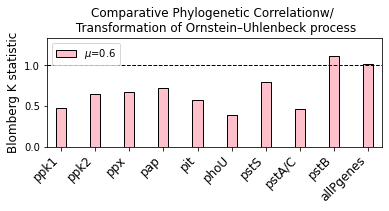

In [19]:
# after R markdown for the correlation statistics
def add_sig(ax,sig,x,y):
    """
    add siginificance to ax; 
    sig :: series object of siginificance p value
    x :: x values in figure
    y :: y values in figure 
    make sure ax and se in same order
    """
    for i,sigi in enumerate(sig):
        star = ''
        while sigi<=0.05:
            star += "*"
            sigi /= 10
            if sigi<0.05/1e4:
                break
        ax.text(x[i]-.2,y[i]*1.05,star)
    
# Plot here
def main(fileprefix="TRUEcorrelation"):
    pil = os.listdir("./comparative_genomics/")# path input list
    pil = [i for i in pil if fileprefix in i and 'png' not in i]
    pil = ['TRUEcorrelation0.6.csv']
    for p in pil:
        corr = pd.read_csv("./comparative_genomics/%s"%p,index_col=0)
        corr.index = ['P-value','Blomberg K Statistic']
        corr.columns = corr.columns.to_series().apply(lambda x: x.split(".")[0].replace("_","/")).values#.apply(), split(expand=True).
        d,n = corr.shape # 
        x = np.arange(n)
        y = corr.iloc[1,:]
        sig = corr.iloc[0,:]
        fig, ax = plt.subplots(1,1,figsize=(6,2))
        y.plot(x=x,kind='bar',ax=ax,ec='k',fc='pink',width=.3)
        ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=45,ha='right',fontsize='large')
        ax.set_ylabel("Blomberg K statistic",fontsize='large')
        parameter = p.replace(fileprefix,"").replace(".csv","")
        ax.set_title("Comparative Phylogenetic Correlation"+\
                     "w/ \n Transformation of Ornstein–Uhlenbeck process")
        ax.legend(labels=["$\mu$=%s"%parameter])
        add_sig(ax,sig,x,y)
        ax.set_ylim((0,y.max()*1.2))
        xlim = ax.get_xlim()
        labels = ax.get_xticklabels()
        ax.hlines(1,xlim[0],xlim[1],linestyles='dashed',linewidth=1)
        fig.savefig("./comparative_genomics/%s"%(p+".png"),bbox_inches='tight',dpi=600)
# main("correlation")
main("TRUEcorrelation")